# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [19]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [20]:
import numpy as np
%autosave 60

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate((y_train,y_test), axis=0)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Autosaving every 60 seconds
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### VISUALIZATION:

In this section the following visualizations are presented:
1. Visualization of all classes (to see what sign corresponds to label)
2. Visualization of frequency of each class at training set. Ordered from more frequent to less frequent (barplot).
3. Visualization of random sample of images. By running this cell several times you get a feeling of how the images are (you can see that they are not uniform in lightning, some are very dark, several signs are half-hidden, etc...)
4. Visualizaation of several opencv transformations applied to an image to improve (e.g. grayscale, equalized...)


#### 1. Visualization of all classes (to see what sign corresponds to label)

In [21]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Visualizations will be shown in the notebook.
%matplotlib inline

# Visualize matplotlib plots with sns aesthetics
sns.set_style('white')

In [22]:
# Check that data is ok. Basic statistics
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

In [23]:
# Load signs descriptions as pandas' dataframes
df_signnames = pd.read_csv('data/signnames.csv')
df_signnames.set_index(df_signnames.ClassId, inplace=True)

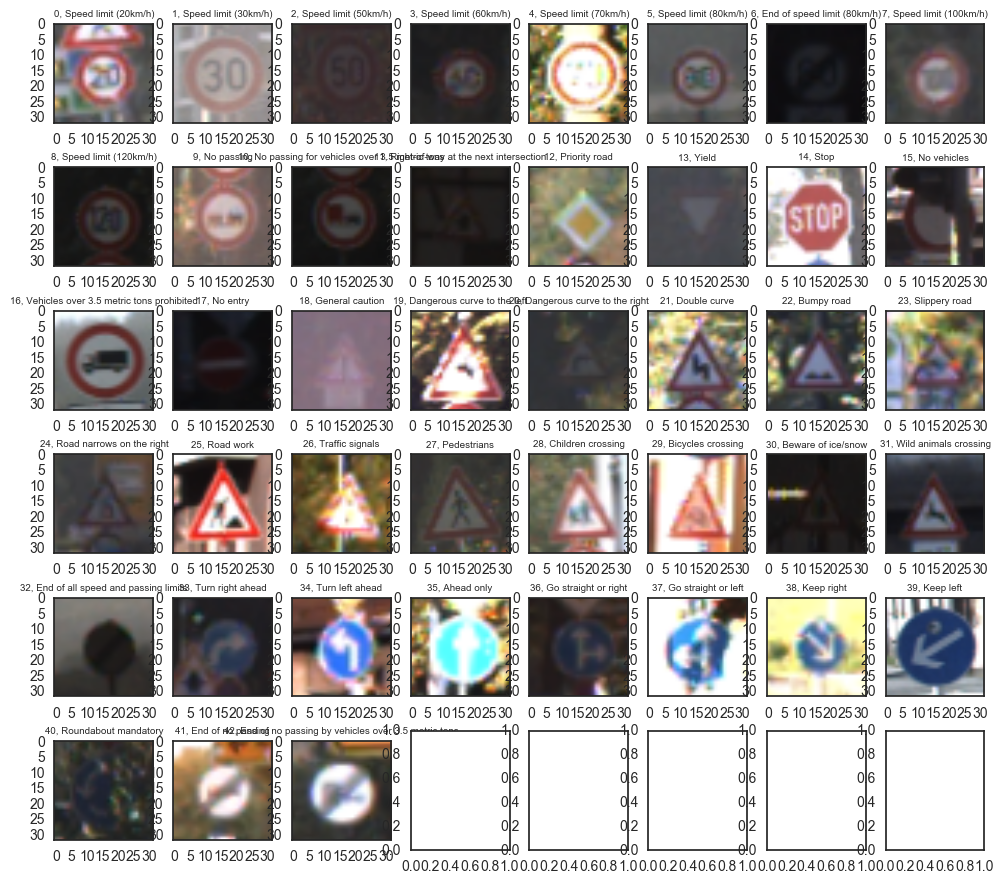

In [24]:
# Visualize all classes to see type of signs (colors, shapes...)

#LET'S CHECK ALL CLASSES
nrows = 6
ncols=8
#list_axes is the combination of grid cells. E.g.(0,0),(1,0)...
list_axes = [(x,y) for x in list(range(0,nrows)) for y in list(range(0,ncols))]

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,nrows*1.8))

# for each grid cell, fill with class image
for i in range(0,len(df_signnames)):
    ax = axes[list_axes[i]]
    index = np.array(y_train==i).astype(int).argmax(axis=0)
    image = X_train[index].squeeze()
    ax.set_title('{}, {}'.format(i,df_signnames.loc[y_train[index],'SignName']), fontsize=7)
    ax.imshow(image)

#### 2. Visualization of frequency of each class at training set. Ordered from more frequent to less frequent (barplot).

Max frequency: 5.7%, class Speed limit (50km/h)
Min frequency: 0.5%, class Speed limit (20km/h)


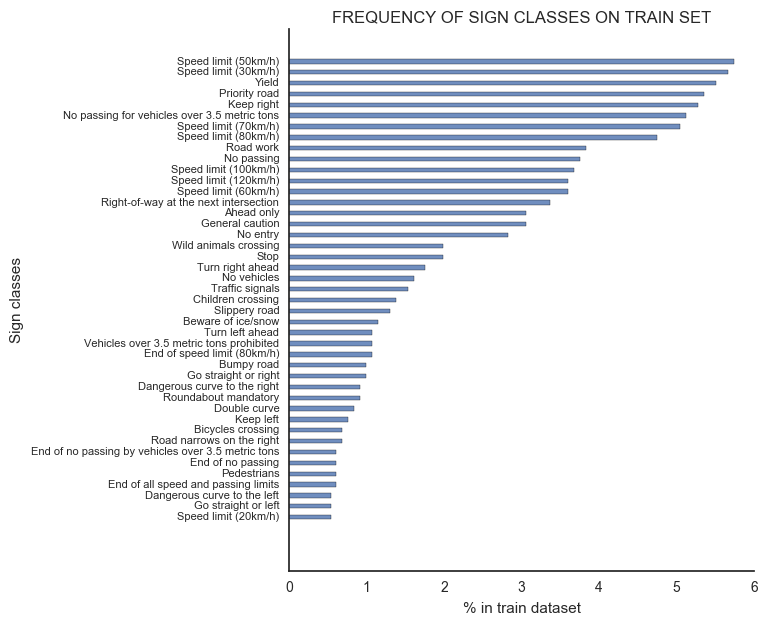

In [25]:
# Visualize frequency of each sign class in train set
## prepare data
df_plot = (pd.DataFrame(y_train)[0].value_counts(normalize=True).sort_index()).to_frame()
df_plot.rename(columns={0:'freq'}, inplace=True)
df_plot = df_plot.merge(df_signnames, how='left', left_index=True, right_index=True)
df_plot['freq'] = df_plot.freq*100.
df_plot.sort_values(by='freq', ascending=True, inplace=True)
df_plot.reset_index(drop=True, inplace=True)

## Min and max frequencies
print ('Max frequency: {:.1f}%, class {}'.format(df_plot.iloc[-1].freq, df_plot.iloc[-1].SignName))
print ('Min frequency: {:.1f}%, class {}'.format(df_plot.iloc[0].freq, df_plot.iloc[0].SignName))

## plot
plt.figure(figsize=(6,7))
plt.barh(bottom = df_plot.index*2, width = df_plot.freq, alpha=0.8, align='center')
plt.ylabel('Sign classes')
plt.xlabel('% in train dataset')
plt.yticks(df_plot.index*2, df_plot.SignName, rotation=0, fontsize=8) 
plt.title('FREQUENCY OF SIGN CLASSES ON TRAIN SET')
sns.despine()
plt.show()


#### 3. Visualization of random sample of images. By running this cell several times you get a feeling of how the images are (you can see that they are not uniform in lightning, some are very dark, several signs are half-hidden, etc...)

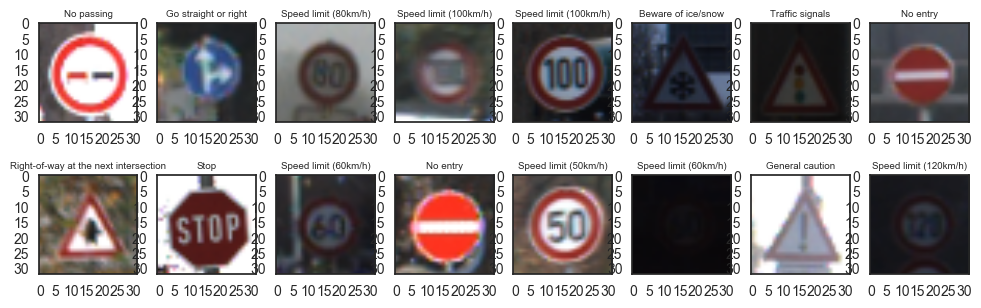

In [27]:
# Visualize a random set of signs - check image vs label
import random

def plot_image(ax):
    ### Plot image + label in chosen axis
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    ax.set_title('{}'.format(df_signnames.loc[y_train[index],'SignName']), fontsize=7)
    ax.imshow(image)

def plot_image_grid(nrows, ncols):
    ### Prepare grid of nrows * ncols with random image signs
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,nrows*1.8))
    for i in [(x,y) for x in list(range(0,nrows)) for y in list(range(0,ncols))]:
        plot_image(axes[i])
    
# Plot a grid of nrows and ncols filled with random images from train dataset.
# Over each images the corresponding label is shown.
plot_image_grid(nrows=2, ncols=8)   

#### 4. Visualization of several opencv transformations applied to an image to improve (e.g. grayscale, equalized...)

The previous visualization suggests that preprocessing of images (lighting darker ones, maybe changing color channels to other less affected by light conditions) may be a good idea to pursue.

So I checked different transformation of image. I tried a combination of several transforms, combining:
* change to grayscale, YUV, other colormaps
* equalize channels (gray, YUV, RGB) separately, using histeq or clahe (see info about equalization here: [link](http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html))

Following presents a grid of the most successful transformations tried:

COLUMN 1: Original image
COLUMN 2: Color image, equalization of each colour channel (clahe or histeq)
COLUMN 3: Color image, changed to YUV, equalization clahe of Y channel (clahe or histeq), return to RGB
COLUMN 4: Gray image from original image
COLUMN 5: Gray image equalized (using equalizeHist)
COLUMN 6: Gray image equalized (using clahe)


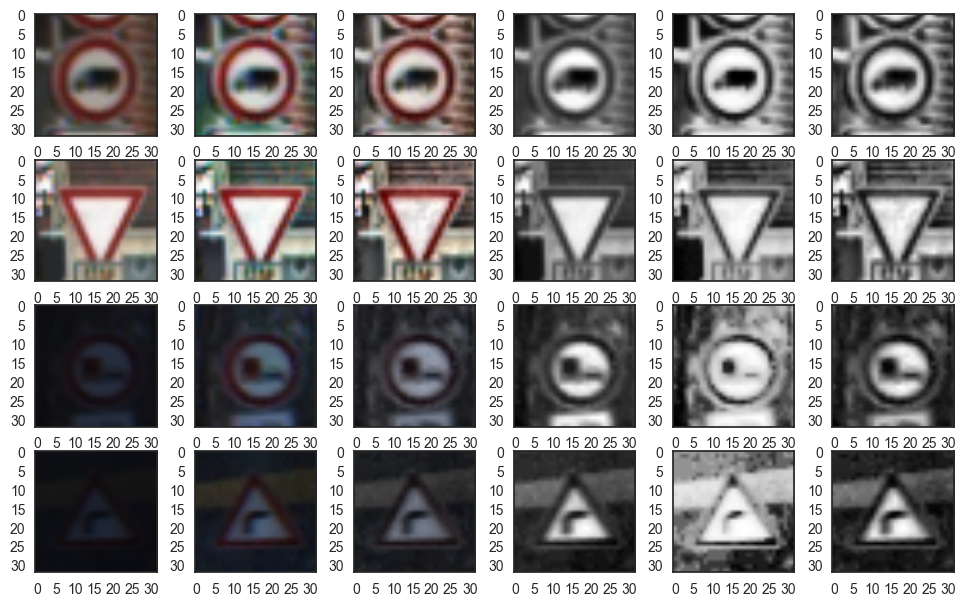

In [61]:
# Transformations using 
# Transformations
import cv2
import random

#Equalize color image by applying histogram equalization or clahe (modify script accordingly)
def histogram_equalize(img):
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(3,3))
    b, g, r = cv2.split(img)
    red = clahe.apply(r)
    green = clahe.apply(g)
    blue = clahe.apply(b)
    return cv2.merge((blue, green, red))

def plot_images_trans(nrows):
    fig, axes = plt.subplots(nrows=nrows, ncols=6, figsize=(12,nrows*1.8))
    
    for r in range(0,nrows):
        ax1 = axes[(r,0)]
        ax2 = axes[(r,1)]
        ax3 = axes[(r,2)]
        ax4 = axes[(r,3)]
        ax5 = axes[(r,4)]
        ax6 = axes[(r,5)]

        kernel_size=3
        
        index = random.randint(0, len(X_train))
        image = X_train[index].squeeze()
        
        #normal image
        ax1.imshow(image)
        
        #eq image
        img_eq = histogram_equalize(image)
        ax2.imshow(img_eq, cmap=None)
        
        #eq image in YUV transformation
        clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(5,5))
        img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])
        img_yuv_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
        ax3.imshow(img_yuv_eq, cmap=None)
        
        #gray image
        img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        ax4.imshow(img_gray, cmap='gray')
        
        #gray image, equalized
        img_gray_eq = cv2.equalizeHist(img_gray)
        ax5.imshow(img_gray_eq, cmap='gray')
        
        #adaptative hist eq
        img_gray_eq_ad = clahe.apply(img_gray)
        ax6.imshow(img_gray_eq_ad, cmap='gray')
        
print ('COLUMN 1: Original image')
print ('COLUMN 2: Color image, equalization of each colour channel (clahe or histeq)')
print ('COLUMN 3: Color image, changed to YUV, equalization clahe of Y channel (clahe or histeq), return to RGB')
print ('COLUMN 4: Gray image from original image')
print ('COLUMN 5: Gray image equalized (using equalizeHist)')
print ('COLUMN 6: Gray image equalized (using clahe)')

plot_images_trans(nrows=4) 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [62]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.


#### 1. Obtain grey image (stored as X_train_gray, X_test_gray)

In [63]:
def transform_img(img):
#     img = img[0]
#     clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(3,3))
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     img_gray = cv2.equalizeHist(img_gray)
    return img_gray.reshape([32,32,1])

X_train_gray = np.ndarray([X_train.shape[0],32,32,1])
for i in range (0, X_train.shape[0]):
    X_train_gray[i] = transform_img(X_train[i])


X_test_gray = np.ndarray([X_test.shape[0],32,32,1])
for i in range (0, X_test.shape[0]):
    X_test_gray[i] = transform_img(X_test[i])


#### 2. Normalize colour images using train mean/std

Colour images are normalized using their global values. Data is centered in 0, with standard deviation of 5.

In [64]:
if True:
    data_mean = X_train.mean()
    data_std = X_train.std()

    X_train = (X_train - data_mean)*5./(data_std)
    X_test = (X_test - data_mean)*5./(data_std)

'Train mean: {:.2f}, std: {:.2f}'.format(X_train.mean(), X_train.std())

'Train mean: -0.00, std: 5.00'

#### 3. Normalize gray images using train mean/std  

Gray images are normalized using their global channel values. Data is centered in 0, with standard deviation of 5.

In [65]:
if True: 
    data_meang = X_train_gray.mean()
    data_stdg = X_train_gray.std()

    X_train_gray = (X_train_gray - data_meang)*5./(data_stdg)
    X_test_gray = (X_test_gray - data_meang)*5./(data_stdg)

'Train gray images mean: {:.2f}, std: {:.2f}'.format(X_train_gray.mean(), X_train_gray.std())

'Train gray images mean: -0.00, std: 5.00'

#### 4. Merge 3 colour channels + 1 gray channel. Resulting dataset has 4 channels  ( stored as X_train, X_test to avoid increased usage of memory)

In [66]:

X_train = np.concatenate((X_train, X_train_gray), axis=3)
X_test = np.concatenate((X_test, X_test_gray), axis=3)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**  

#### PREPROCESSING TOC:

I tried several techniques:

    * Data augmentation by shifting image 2 pixels down and 2 pixels right
    * Data augmentation by vertical flip of images corresponding to symetrical signs, and to sign that had right/left versions
    * Image processing changing to several color patterns (YUV, grayscale)
    * Image processing equalizing channel Y (correction of brightness) (using CLAHE and equalhist)
    * Image processing equalizing each channel of RGB image (using CLAHE and equalhist)
    * Image normalization of colour image (global mean centered in 0, tried global std adjusted to 1, 5 ,10). 
    * Image normalization of gray image (global mean centered in 0, tried global std adjusted to 1, 5 ,10). 

I decided to preprocess the data following this steps (python scripts in previous cells):
1. Obtain grey image (stored as X_train_gray, X_test_gray)
2. Normalize colour images using train mean/std
3. Normalize gray images using train mean/std
4. Merge 3 colour channels + 1 gray channel. Resulting dataset has 4 channels  ( stored as X_train4d, X_test4d)

I chose preprocessing technique by plotting metrics of a neural network feed with several image preprocessing transformations. Kept best-performance preprocessing combinations. I attach a list of different techniqued used:

* Model 1: Color layer + gray layer (histeq)*
* Model 2: Color layer + gray layer (clahe, cv2.createCLAHE(clipLimit=10.0, tileGridSize=(3,3))
* Model 3: model 2 lowering clipLimit to 2
* Model 4: model 2 lowering clipLimit to 1*

    CONCLUSION: GRAY USE + histeq  
    
* Model 5: color (channel histeq) + gray (histeq)-> great loss of accuracy by applying color hist
* Model 6: color converted to YUV, histeq Y channel, return to RGB + gray(histeq)
* Model 7: color (channel clahe) + gray (histeq)
* Model 8: color converted to YUV, clahe Y channel, return to RGB + gray(histeq): PERFORMS HORRENDOUSLY!!!

    CONCLUSION: MODELS 5, 6,7,8 DO NOT IMPROVE ACCURACY  

* Model 9: color normalized (std1), gray (histeq)
* Model 10: color normalized (std1), gray(no transformed)

    CONCLUSION: better gray without transformation, color normalized  

* Model 11: color normalized 1, gray normalized 1
* Model 12: color normalized 5, gray normalized 5
* Model 13: color normalized 5, gray normalized 5, w incremented sigma from 0.1 to 0.2

    CONCLUSION: smaller sigma initializes worse. Normalize to 5 is ok.
KEEP color normalized 5, gray normalized 5, sigma 0.1

### OVERALL SELECTED MODEL: #12
* colour + gray channel
* colour normalized to 5
* grey normalized to 5
* sigma = 0.1

(following plot produced using notebook 'Model results')  

<img src='img/models_01_to_13.png'>

In [67]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.



In [68]:
import datetime as dt
###DATA AUGMENTATION

start_time = dt.datetime.now()
## Try 1: vertical flip
## same_label are classes that are identical if flipped
## new_label are classes that when flipped transform into a different class (e.g. turn right becomes turn left)
number_cases = len(y_train)
if False:
    same_label = [11, 12, 13, 15, 17, 18, 22, 26, 30]
    new_label = [19,20,33,34,36,37,38,39]

    new_label_dict = {
                    19: 20,
                    20: 19,
                    33: 34,
                    34: 33,
                    36: 37,
                    37: 36,
                    38: 39,
                    39: 38
    }

   

    for i in range(0, number_cases):
#         if y_train[i] in same_label:
#             X_train = np.concatenate((X_train,cv2.flip(X_train[i],1).reshape(1,32,32,4)), axis=0)
#             y_train = np.concatenate((y_train, [y_train[i]]), axis=0)
        if y_train[i] in new_label:
            X_train = np.concatenate((X_train,cv2.flip(X_train[i],1).reshape(1,32,32,4)), axis=0)
            y_train = np.concatenate((y_train, [new_label_dict[y_train[i]]]), axis=0)    
end_time = dt.datetime.now()
print ('Time: {}'.format(str(end_time - start_time).split('.', 2)[0]+'s'))    

Time: 0:00:00s


In [69]:
import datetime as dt
###DATA AUGMENTATION
start_time = dt.datetime.now()

## Try 2: move image
if False:
    X_train_augmented = np.copy(X_train)
    X_train_augmented[:,2:,2:,:]=X_train_augmented[:,:30,:30,:]
    
    X_train = np.concatenate((X_train, X_train_augmented), axis=0)
    y_train = np.concatenate((y_train, y_train), axis=0)
    

end_time = dt.datetime.now()
print ('Time: {}'.format(str(end_time - start_time).split('.', 2)[0]+'s')) 

Time: 0:00:00s


In [70]:
# Check that data is ok. Basic statistics
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))
print ('Original train size: {}'.format(number_cases))
print ('Augmented train size: {}'.format(len(y_train)))

Original train size: 39209
Augmented train size: 39209


In [38]:
##DATASET SPLIT

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,test_size= 0.2,random_state=0, 
                                                                stratify=y_train)



### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

#### 1. Data augmentation:
I tried to augment data (more data is better for neural networks). I followed several strategies: vertical flip + moving image 2 px down and right. But it didn't seem to improve performance.

* Model 26: Baseline (original datset)
* Model 27: increase of dataset by vertical flipping symetric signs (increased 35% train dataset on this trial)
* Model 28: increase of dataset by moving image 2 pixels right + 2 pixels down

Nevertheles... I must have done it wrongly because augmented dataset did not improve model performance.

<img src='img/models_26_to_28.png'>

#### 2. TRAIN/ VALIDATION/ TEST SPLIT  

I sepparate into train/validation, keeping class distribution. Checked that class distribution was the same with train validation, using plot.

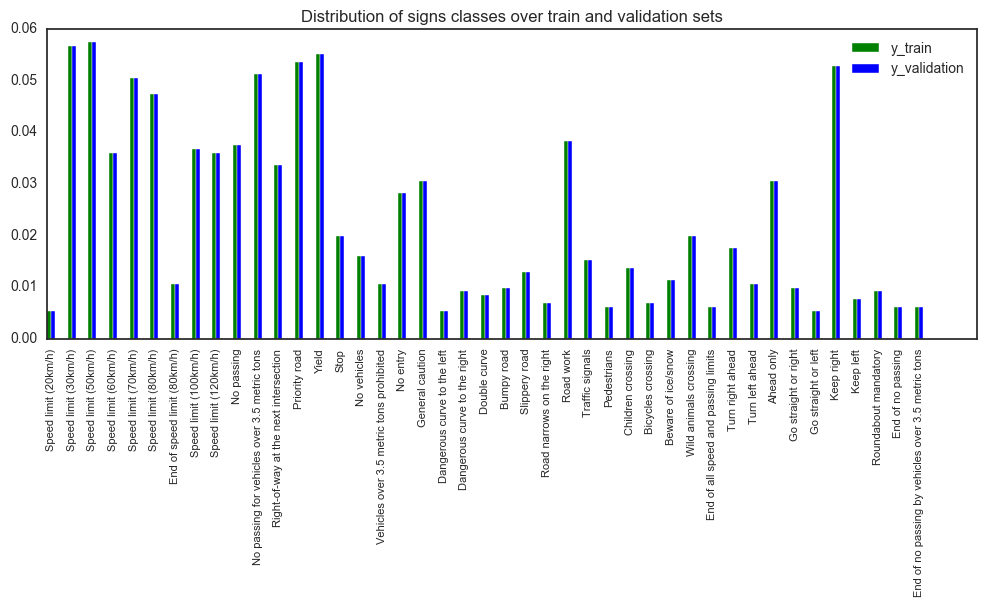

In [39]:
#Check that train/test have similar distribution of classes
df_plot = (pd.DataFrame(y_train)[0].value_counts(normalize=True).sort_index()).to_frame()
df_plot.rename(columns={0:'y_train'}, inplace=True)
df_plot['y_validation'] = pd.DataFrame(y_validation)[0].value_counts(normalize=True).sort_index()
df_plot.transpose()

plt.figure(figsize=(12,4))
plt.bar(left = df_plot.index, height = df_plot.y_train, width=0.2, color='g', edgecolor='w')
plt.bar(left = df_plot.index+0.2 , height = df_plot.y_validation,  width=0.2, color='b', edgecolor='w')
locs, labels = plt.xticks()
plt.xticks(df_signnames.ClassId+0.2, df_signnames.SignName, rotation=90, fontsize=8) 
plt.legend(['y_train','y_validation'], loc='best', fontsize=10, framealpha=0.2)
plt.title('Distribution of signs classes over train and validation sets')
plt.show()

----

In [40]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
mu = 0
sigma = 0.1

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #convnets
    layer_1 = {'in':[32,32,4], 'out':[28,28,6], 'filter':[5,5,4], 
               'strides': [1, 1, 1, 1],  'padd':'VALID'} #'padd':[0,0]
    
    ly1_max = {'in':[28,28,6], 'out':[14,14,6], 'ksize':[1,2,2,1], 
               'strides': [1, 2, 2, 1],  'padd':'VALID'} #'padd':[0,0]
    
    layer_2 = {'in': [14,14,6], 'out':[10,10,16], 'filter':[5,5,6], 
               'strides': [1, 1, 1, 1],  'padd':'VALID'} #'padd':[0,0]

    ly2_max = {'in':[10,10,16], 'out':[5,5,16], 'ksize':[1,2,2,1], 
               'strides': [1, 2, 2, 1],  'padd':'SAME'} #'padd':[0,0]
    
    layer_3 = {'in':400, 'out':120}
    
    layer_4 = {'in':120, 'out':84}
    
    layer_5 = {'in':84, 'out':43}
    
    weights = {
        # The shape of the filter weight is (height, width, input_depth, output_depth)
    'layer_1': tf.Variable(tf.truncated_normal(
        [layer_1['filter'][0], layer_1['filter'][1], layer_1['in'][2], layer_1['out'][2]],
                          mean=mu, stddev=sigma), name='layer_1_w'),

    'layer_2': tf.Variable(tf.truncated_normal(
        [layer_2['filter'][0], layer_2['filter'][1], layer_2['in'][2], layer_2['out'][2]],
                          mean=mu, stddev=sigma), name='layer_2_w'),

    'layer_3': tf.Variable(tf.truncated_normal(
        shape=(layer_3['in'], layer_3['out']), mean = mu, stddev = sigma), name='layer_3_w'),
   
    'layer_4': tf.Variable(tf.truncated_normal(
        shape=(layer_4['in'], layer_4['out']), mean = mu, stddev = sigma), name='layer_4_w'),

    'layer_5': tf.Variable(tf.truncated_normal(
        shape=(layer_5['in'], layer_5['out']), mean = mu, stddev = sigma), name='layer_5_w'),
    }
    biases = {
        'layer_1': tf.Variable(tf.zeros(layer_1['out'][2]), name='layer_1_b'),
        'layer_2': tf.Variable(tf.zeros(layer_2['out'][2]), name='layer_2_b'),
        'layer_3': tf.Variable(tf.zeros(layer_3['out']), name='layer_3_b'),
        'layer_4': tf.Variable(tf.zeros(layer_4['out']), name='layer_4_b'),
        'layer_5': tf.Variable(tf.zeros(layer_5['out']), name='layer_5_b')
    }
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    ly1conv = tf.nn.conv2d(x, 
                         weights['layer_1'], 
                         strides= layer_1['strides'], 
                         padding= layer_1['padd'])
    ly1conv = tf.nn.bias_add(ly1conv, biases['layer_1'])

    # TODO: Activation.
    ly1relu = tf.tanh(ly1conv)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    ly1maxpool = tf.nn.max_pool(ly1relu,
                     ksize = ly1_max['ksize'],
                     strides= ly1_max['strides'], 
                     padding= ly1_max['padd'])
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    ly2conv = tf.nn.conv2d(ly1maxpool, 
                         weights['layer_2'], 
                         strides= layer_2['strides'], 
                         padding= layer_2['padd'])
    ly2conv = tf.nn.bias_add(ly2conv, biases['layer_2'])
    
    # TODO: Activation.
    ly2relu = tf.tanh(ly2conv)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    ly2maxpool = tf.nn.max_pool(ly2relu,
                     ksize = ly2_max['ksize'],
                     strides= ly2_max['strides'], 
                     padding= ly2_max['padd'])
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    ly2flat = flatten(ly2maxpool)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    ly3fc = tf.add(
            tf.matmul(ly2flat, weights['layer_3']),
            biases['layer_3'])

    # TODO: Activation.
    ly3relu = tf.tanh(ly3fc)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    ly4fc = tf.add(
            tf.matmul(ly3relu, weights['layer_4']),
            biases['layer_4'])
    
    # TODO: Activation.
    ly4relu = tf.tanh(ly4fc)
    
    ly4drop = tf.nn.dropout(ly4relu, keep_prob=keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(ly4drop, weights['layer_5']), biases['layer_5'])

    
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

LeNet based Neural network. Below are detailed the successive layers, including input/output sizes, kernel and strides.

The structure is:

`____CONV. LAYER ->  POOL  -> CONV LAYER  ->  POOL   ->  FLATTEN -> FC LAYER -> FC LAYER -> FC LAYER`  
`32x32x4  ->  28x28x6 -> 14x14x6  ->  10x10x16 ->  5x5x16   ->   400   ->   120     ->    84    ->  43` 

All activation functions are [tf.tahn()](https://www.tensorflow.org/api_docs/python/nn/activation_functions_#tanh) 

* LAYER 1: Convolutional. Input = 32x32x4. Output = 28x28x6.
        layer_1 = {'in':[32,32,4], 'out':[28,28,6], 'filter':[5,5,4], 
                'strides': [1, 1, 1, 1],  'padd':'VALID'}

* Activation: tanh
* Max Pooling. Input = 28x28x6. Output = 14x14x6.
        ly1_max = {'in':[28,28,6], 'out':[14,14,6], 'ksize':[1,2,2,1], 
                'strides': [1, 2, 2, 1],  'padd':'VALID'}
* LAYER 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
        layer_2 = {'in': [14,14,6], 'out':[10,10,16], 'filter':[5,5,6], 
               'strides': [1, 1, 1, 1],  'padd':'VALID'} #'padd':[0,0]

* Activation: tanh
* Max Pooling. Input = 10x10x16. Output = 5x5x16.
        ly2_max = {'in':[10,10,16], 'out':[5,5,16], 'ksize':[1,2,2,1], 
               'strides': [1, 2, 2, 1],  'padd':'SAME'} #'padd':[0,0]
    
* Flatten. Input = 5x5x16. Output = 400.  

* LAYER 3: Fully Connected. Input = 400. Output = 120.
* Activation: tanh  

* LAYER 4: Fully Connected. Input = 120. Output = 84.
* Activation: tanh
* Dropout layer, keep_prob=0.7  

* LAYER 5: Fully Connected. Input = 84. Output = 43  


In [41]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

from sklearn.utils import shuffle
from sklearn.externals import joblib
import pickle
import random

import datetime as dt

In [42]:
### Train your model here.
### Feel free to use as many code cells as needed.

#TRAIN PARAMETERS
EPOCHS = 40
BATCH_SIZE = 128
rate = 0.0007

keep_prob = tf.placeholder(tf.float32)
proba = tf.Variable()

#BATCH PLACEHOLDERS
x = tf.placeholder(tf.float32, (None, 32, 32, 4))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# TRAINING PIPELINE
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# MODEL EVALUATION
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy, total_loss = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss/num_examples, total_accuracy/num_examples

In [24]:
start_time = dt.datetime.now()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    metrics={}
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.7})
            
        loss_metric, validation_accuracy = evaluate(X_validation, y_validation)
        
        if i in [4,9,14,19,24,29,34,39,44,49,54,59]:
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print("Validation loss = {:.3f}".format(loss_metric))
            print()
        metrics[i+1]={'val_acc':validation_accuracy, 'val_loss':loss_metric}
    
    print ('FINAL METRICS')
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Validation loss = {:.3f}".format(loss_metric))

    end_time = dt.datetime.now()
    print ('Training time: {}'.format(str(end_time - start_time).split('.', 2)[0]+'s'))
    
    #Save data
    save_path = saver.save(sess, 'models/model_20170109')
    print("Model saved in file: %s" % save_path)
    print (' ')
    print (metrics)

Training...

EPOCH 5 ...
Validation Accuracy = 0.969
Validation loss = 0.137

EPOCH 10 ...
Validation Accuracy = 0.982
Validation loss = 0.070

EPOCH 15 ...
Validation Accuracy = 0.982
Validation loss = 0.069

EPOCH 20 ...
Validation Accuracy = 0.983
Validation loss = 0.062

EPOCH 25 ...
Validation Accuracy = 0.985
Validation loss = 0.057

EPOCH 30 ...
Validation Accuracy = 0.983
Validation loss = 0.066

EPOCH 35 ...
Validation Accuracy = 0.981
Validation loss = 0.074

EPOCH 40 ...
Validation Accuracy = 0.988
Validation loss = 0.054

FINAL METRICS
Validation Accuracy = 0.988
Validation loss = 0.054
Training time: 0:02:17s
Model saved in file: models/model_20170109
 
{1: {'val_loss': 0.78993593640121929, 'val_acc': 0.8107625606320884}, 2: {'val_loss': 0.38091674279844356, 'val_acc': 0.91481764857424241}, 3: {'val_loss': 0.22124326268429051, 'val_acc': 0.95256312165263968}, 4: {'val_loss': 0.16755097332436406, 'val_acc': 0.96250956388676356}, 5: {'val_loss': 0.13743173028134595, 'val_acc

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**  


Optimization using Adamoptimizer

Batch size same as stated: 128

Number of EPOCHS: while developing model, it was observed that training usually stabilizes around epoch 35-40. Chosen epoch=40

Learning rate tunned while choosing model (observed similar performance for 0.001 and 0.0005, but bigger learning makes convergence faster). Chosen 0.0007

In all process metrics are used to choose model / tune parameter, plotted.

See auxiliar notebook ('model_results' for plots of most model trials)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**  

Start from LeNet architecture.

Identify elements of improvement (dataset augmentation, dataset preprocessing, architecture changing, change of activation functions, hyperparameters...). Systematic identification of best configuration by using plotting of logloss / accuracy (see notebook 'model results2).

As an example, comparison of models:

* Model 17: change of layer1, layer2, layer3, layer4 activation function to tanh

    CONCLUSION: activation functions tanh for all layers
* Model 19: ly4_dropout added

    CONCLUSION: IF DROPOUT, USE AS EXTRA AT LAYER 4. Investigate again when increasing epoch (change keep_proba parameter)
* Model 23: change of layer1, layer2, layer3, layer4 activation function to sigmoid

<img src='img/models_17_to_23.png'>

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Most images are from GoogleMaps.

`Stop` sign source: http://store.hallsigns.com/assets/images/SPSK1W4.jpg

`no entry` sign source: https://thumbs.dreamstime.com/t/no-entry-traffic-sign-suburb-entrance-road-above-green-forest-background-44129287.jpg


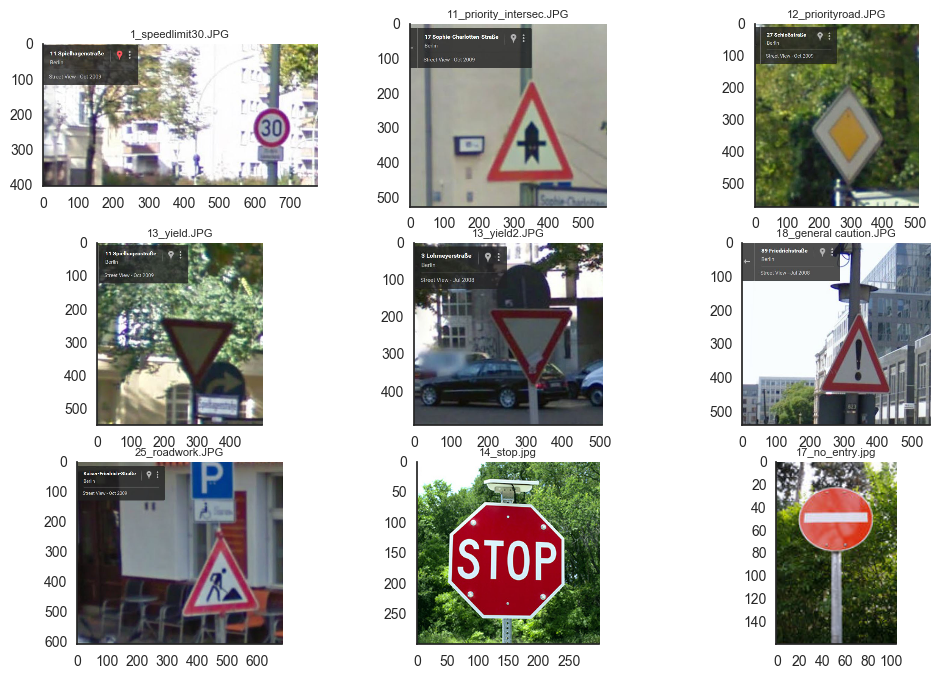

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# First step: obtain images

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,8))

ax_list = [(x,y) for x in range(0,3) for y in range(0,3)]

filename = ['1_speedlimit30.JPG',
    '11_priority_intersec.JPG',
    '12_priorityroad.JPG',
    '13_yield.JPG',
    '13_yield2.JPG',
    '18_general caution.JPG',
    '25_roadwork.JPG',
    '14_stop.jpg',
    '17_no_entry.jpg']

for i in range(0,len(filename)):
    image = plt.imread('img/original signs/'+filename[i])
    axes[ax_list[i]].set_title(filename[i], fontsize=8)
    axes[ax_list[i]].imshow(image)


In [131]:
#Create numpy array
import matplotlib.image as mpimg
from scipy import ndimage, misc

def read_image(file):
    return plt.imread('img/32x32signs/a'+file,0)

#     return 255*(mpimg.imread('img/32x32signs/'+file))

X_new = np.zeros(shape=[8,32,32,3])
y_new = np.ndarray(shape=[8], dtype=int)

X_new[0] = read_image('1_speedlimit30.png')
y_new[0] = 1
X_new[1] = read_image('11_priority_intersec.png')
y_new[1] = 11
X_new[2] = read_image('12_priorityroad.png')
y_new[2] = 12
X_new[3] = read_image('13_yield.png')
y_new[3] = 13
X_new[4] = read_image('14_stop.png')
y_new[4] = 14
X_new[5] = read_image('17_no_entry.png')
y_new[5] = 17
X_new[6] = read_image('18_general caution.png')
y_new[6] = 18
X_new[7] = read_image('25_roadwork.png')
y_new[7] = 25

In [132]:
X_new = X_new.astype(np.uint8)

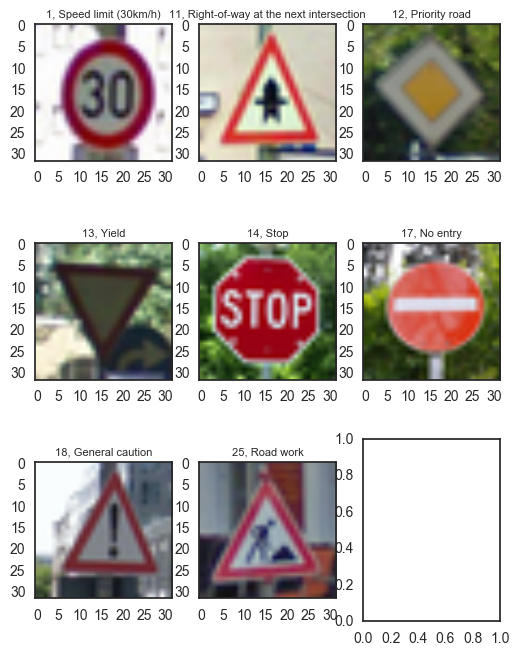

In [133]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6,8))

ax_list = [(x,y) for x in list(range(0,3)) for y in list(range(0,3))]
for i in range(0,8):
    image = X_new[i]
    
    axes[ax_list[i]].set_title('{}, {}'.format(y_new[i], df_signnames[df_signnames.ClassId == y_new[i]]['SignName'].values[0]), fontsize=8)
    axes[ax_list[i]].imshow(image)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Images look good image examples in terms of luminosity / shape / clarity. In this case, images have been mostly captured from google maps, converted to 32x32 pixels, dpi=100 using an external program.

No reason apriori for an inacurate classification. 

QUALITIES THAT MIGHT MAKE CLASSIFICATION DIFFICULT?  
There are some qualities that might make a classification of new traffic sign images difficult. The following list includes some of them:

Problems avoided while choosing candidates:
- `Traffic signs not included in training set`: if an traffic sign was not included in training set, it will be misclassified. While selecting candidate images only those corresponding to signs already trained have been included.

- `The images are from other countries, thus design may vary`: country signs may vary a bit, specially regarding content of warning signs. To prevent this, google maps images have been taken from Berlin roads (so, they belong to German sign). The only two signs not from Germany are the stop and no entry, but their design is mostly identical to the german one.

- `Image blured, presence of multiple traffic signs in one image, sign not centered...`: in this case, all chosen candidates show good quality to avoid this problem. And they have been cropped to show only one image, centered.

Problems present in candidate images, not avoided (might affect classification):  
- `The signs may have varied in design over time`: the training set corresponds to 2011. German signs may have varied a bit in design over time. Google map images are more actual, so may have changed in time.

- `Posible distortion of google maps images`: as images are taken from street view in GoogleMaps, it may be subject to some distortion, and that may reflect in classification.

- `Different preprocessing`: as images are downloaded from internet,  the preprocessing (cropping, resizing, etc.) has been done by me, trying to guess how original training dataset was processed. This preprocesssing may affect the characteristics of candidate images, making them different from original training images in a way no evident to the naked eye. 



In [134]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [135]:
#PREPROCESS

def transform_new(img):    
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img_gray.reshape([32,32,1])

#OBTAIN GRAY IMAGE
X_new_gray = np.ndarray([X_new.shape[0],32,32,1])

for i in range (0, X_new.shape[0]):
    X_new_gray[i] = transform_new(X_new[i])

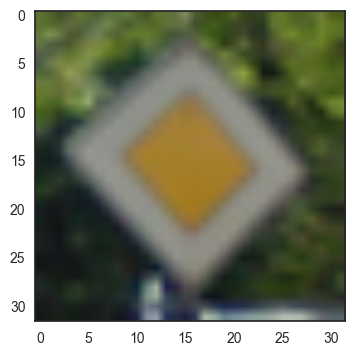

In [136]:
plt.imshow(X_new[2].reshape(32,32,3))

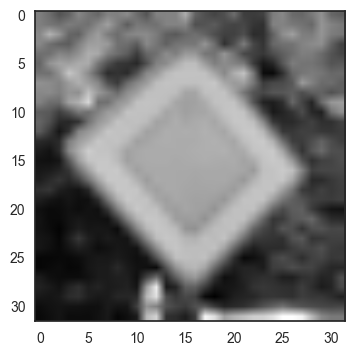

In [137]:
plt.imshow(X_new_gray[2].reshape(32,32), cmap='gray')

In [138]:
#Normalize
# import tensorflow as tf
# saver = tf.train.Saver()

X_new = (X_new - data_mean)*5./(data_std)

X_new_gray = (X_new_gray - data_meang)*5./(data_stdg)

#merge
X_new = np.concatenate((X_new, X_new_gray), axis=3)

X_new = X_new.astype(np.float64)
y_new = y_new.astype(np.uint8)

with tf.Session() as sess:
    saver.restore(sess, 'models/model_20170109')
    print(list(sess.run(tf.argmax(logits, dimension=1), feed_dict={x: X_new, keep_prob: 1})))

    loss_metric, test_accuracy = evaluate(X_new, y_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test loss = {:.3f}".format(loss_metric))


[1, 11, 12, 13, 14, 17, 22, 25]
Test Accuracy = 0.875
Test loss = 0.558


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._



**Answer:**

My model seems to perform a bit worse in new images. Testing performs around 94.7%, while downloaded images perform 87.5% Thus there seems to be a difference of one order in accuracy.

I suspect part of the bad performane might have to do with less frequent classes that are very similar with another, and that maybe dataset agumentation might improve performance.

In [139]:
with tf.Session() as sess:
    saver.restore(sess, 'models/model_20170109')
    
    loss_metric, test_accuracy = evaluate(X_test, y_test)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test loss = {:.3f}".format(loss_metric))

Test Accuracy = 0.947
Test loss = 0.238


In [202]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
predictions = [1, 11, 12, 13, 14, 17, 22, 25]
print (['Real_{}-Predicted_{}'.format(y_new[i],predictions[i]) for i in range(0,8)])
print ('')


with tf.Session() as sess:
    saver.restore(sess, 'models/model_20170109')
    print(list(sess.run(tf.argmax(logits, dimension=1), feed_dict={x: X_new, keep_prob: 1})))
#     print(list(sess.run(tf.nn.softmax(logits, name=None), feed_dict={x: X_new, keep_prob: 1})))
    proba = list(sess.run(tf.nn.softmax(logits, name=None), feed_dict={x: X_new, keep_prob: 1}))



['Real_1-Predicted_1', 'Real_11-Predicted_11', 'Real_12-Predicted_12', 'Real_13-Predicted_13', 'Real_14-Predicted_14', 'Real_17-Predicted_17', 'Real_18-Predicted_22', 'Real_25-Predicted_25']

[1, 11, 12, 13, 14, 17, 22, 25]


In [280]:
probabilities = pd.DataFrame(proba, columns=df_signnames.SignName.values)

probabilities.set_index(y_new, inplace=True, drop=True)
df_plot = probabilities.transpose()

df_plot.reset_index(drop=False, inplace=True)
df_plot.rename(columns={'index':'Sign'}, inplace=True)
df_plot.head(5)

,Sign,1,11,12,13,14,17,18,25
0,Speed limit (20km/h),1.158115e-05,5.743229e-09,6.403755e-14,2.200953e-10,7.211376e-07,2.539189e-05,0.000769,9.363993e-13
1,Speed limit (30km/h),9.999877e-01,5.865864e-08,1.014597e-12,1.220712e-06,3.132527e-04,7.082359e-03,0.000003,4.499239e-09
2,Speed limit (50km/h),4.086898e-08,4.057123e-07,6.269493e-11,2.627451e-11,6.215860e-05,2.038303e-06,0.000015,2.791374e-08
3,Speed limit (60km/h),1.993853e-10,3.483910e-09,1.718881e-12,1.393500e-08,2.170921e-04,2.054296e-04,0.004751,4.570761e-10
4,Speed limit (70km/h),3.302414e-07,1.134818e-12,8.252236e-13,2.195784e-09,2.452499e-07,1.054960e-07,0.000019,3.801452e-08


In [292]:
dict_names = {1: '1 - Speed limit (30km/h)',
 11 : '11 - Right-of-way at the next intersection',
 12 : '12 - Priority road',
 13 : '13 - Yield',
 14 : '14 - Stop',
 17 : '17 - No entry',
 18 : '18 - General caution',
 25 : '25 - Road work'}

In [295]:
df_heat = probabilities.transpose()
df_heat.rename(columns=dict_names, inplace=True)

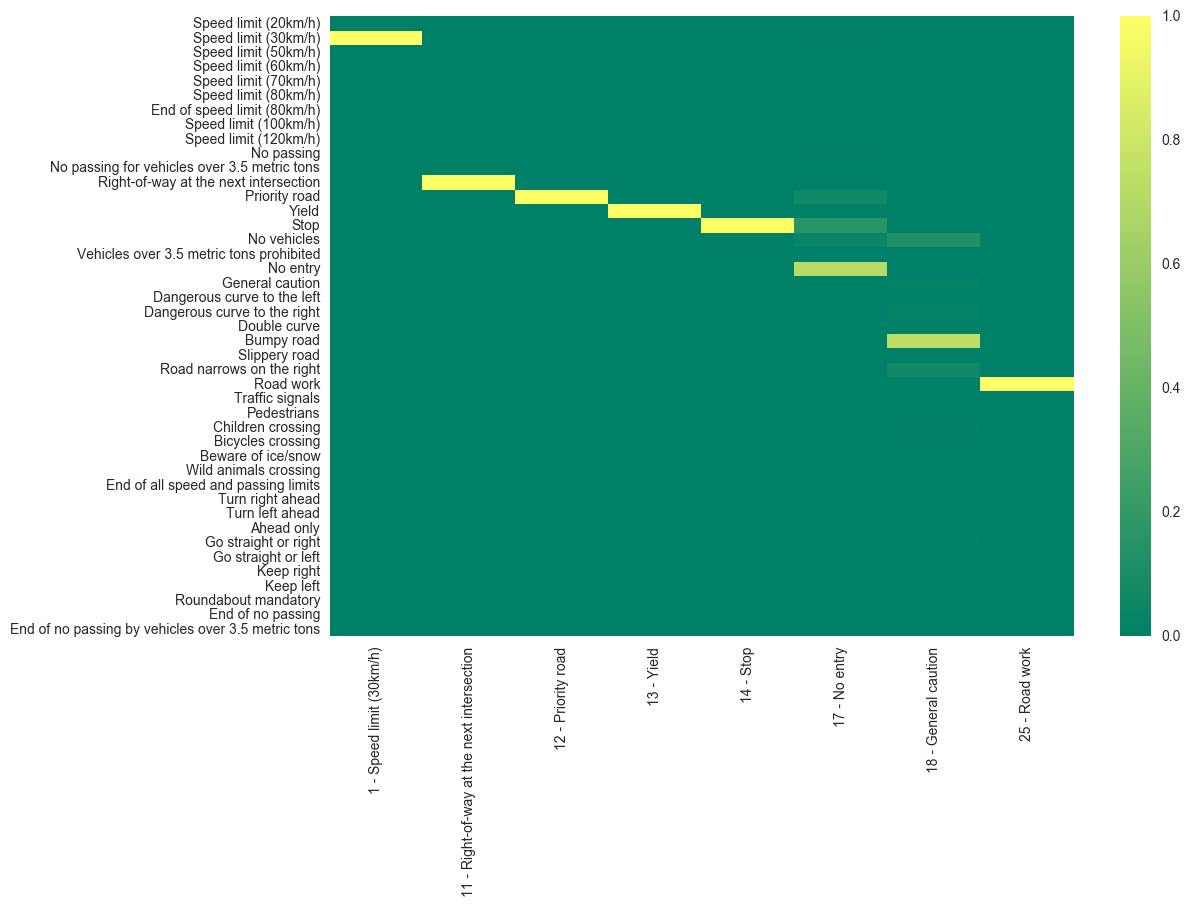

In [307]:
fig = plt.figure(figsize=[12,8])
_=sns.heatmap(df_heat, cmap='summer')

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** 

The model predicted correctly all classes except one.  

The class misclassified was a 18 but was misclassified as 22. Reviewing the probabilities, it shows that the correct class was the fifth option ('22' p=0.74, while correct class '18' p=0.02) 

In [39]:
with tf.Session() as sess:
    saver.restore(sess, 'models/model_20170109')
    print(sess.run(tf.nn.top_k(tf.nn.softmax(logits, name=None), k=5), feed_dict={x: X_new, keep_prob: 1}))



TopKV2(values=array([[  9.99987721e-01,   1.15810744e-05,   3.30240198e-07,
          1.33931522e-07,   1.13610184e-07],
       [  9.98751640e-01,   1.10112270e-03,   4.14475217e-05,
          3.23838613e-05,   3.19004721e-05],
       [  1.00000000e+00,   6.57479093e-09,   5.81204596e-09,
          4.89808105e-09,   4.04850242e-09],
       [  9.99993205e-01,   3.00486818e-06,   1.22071151e-06,
          1.15162493e-06,   6.34177979e-07],
       [  9.97881472e-01,   1.40238577e-03,   3.13251192e-04,
          2.17091030e-04,   6.21583677e-05],
       [  7.16953635e-01,   1.58887774e-01,   6.80266172e-02,
          3.70400026e-02,   7.08233984e-03],
       [  7.35323370e-01,   1.21233337e-01,   6.67581931e-02,
          2.20367294e-02,   1.61129534e-02],
       [  9.99999166e-01,   4.27830685e-07,   1.86225364e-07,
          8.24759212e-08,   3.80143810e-08]], dtype=float32), indices=array([[ 1,  0,  4,  7, 17],
       [11, 30, 21,  7, 27],
       [12, 26, 14, 10, 32],
       [13, 12,  1

Selected class: 	Speed limit (30km/h),100.0%,
Real class:      	Speed limit (30km/h) (class 1)


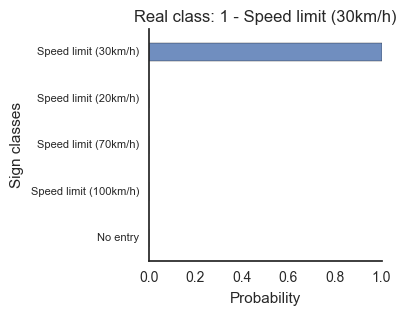

Selected class: 	Right-of-way at the next intersection,99.9%,
Real class:      	Right-of-way at the next intersection (class 11)


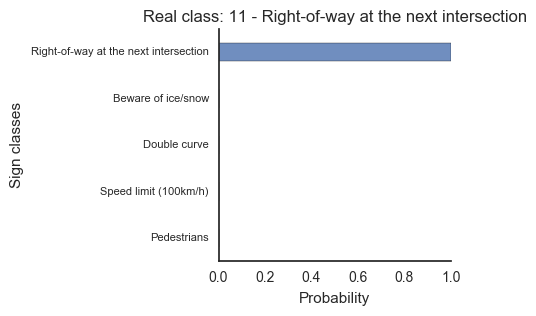

Selected class: 	Priority road,100.0%,
Real class:      	Priority road (class 12)


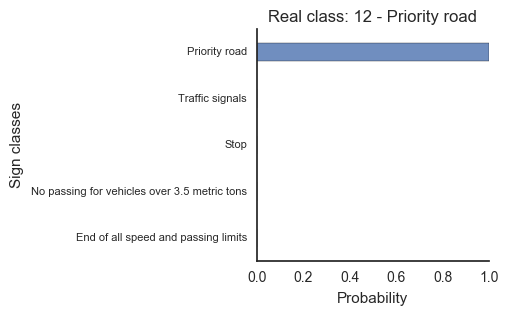

Selected class: 	Yield,100.0%,
Real class:      	Yield (class 13)


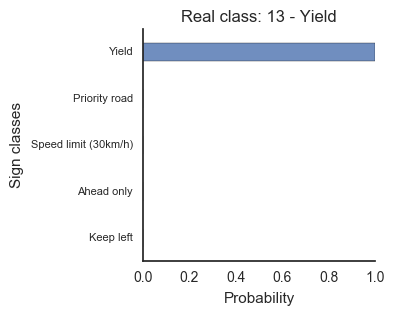

Selected class: 	Stop,99.8%,
Real class:      	Stop (class 14)


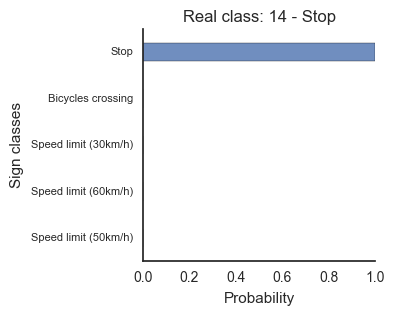

Selected class: 	No entry,71.7%,
Real class:      	No entry (class 17)


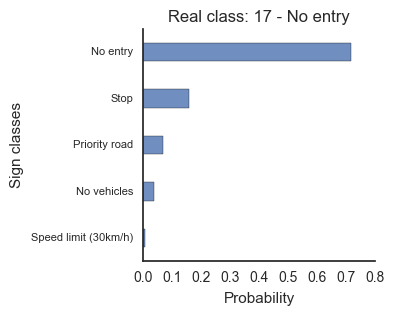

Selected class: 	Bumpy road,73.5%,
Real class:      	General caution (class 18)


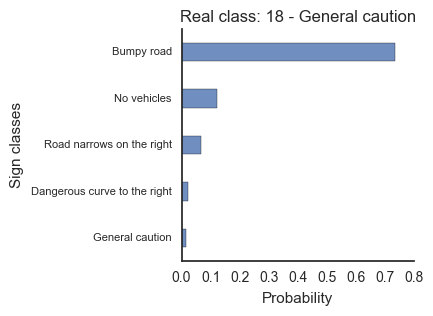

Selected class: 	Road work,100.0%,
Real class:      	Road work (class 25)


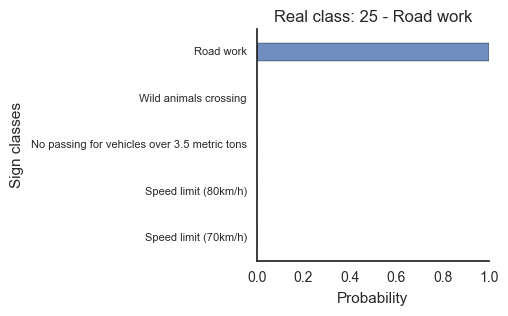

In [229]:
real_classes = list(y_new)

for rc in real_classes:

    ## Min and max frequencies
    df_plot.sort_values(by=rc, ascending=True, inplace=True)
    df_plot.reset_index(drop=True, inplace=True)
    
    print ('Selected class: \t{},{:.1f}%,'.format( df_plot.iloc[-1].Sign, df_plot[rc].iloc[-1]*100.))
    print ('Real class:      \t{} (class {})'.format(df_signnames.loc[df_signnames.ClassId==rc].SignName.values[0], rc))

    ## plot
    plt.figure(figsize=(3,3))
    plt.barh(bottom = df_plot.iloc[-5:].index*2, width = df_plot.iloc[-5:][rc], alpha=0.8, align='center')
    plt.ylabel('Sign classes')
    plt.xlabel('Probability')
    plt.yticks(df_plot.iloc[-5:].index*2, df_plot.iloc[-5:].Sign, rotation=0, fontsize=8) 
    plt.title('Real class: {} - {}'.format(rc,df_signnames.loc[df_signnames.ClassId==rc].SignName.values[0]))
    sns.despine()
    plt.show()

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.